<a href="https://colab.research.google.com/github/steflhermitte/EO-Notebooks/blob/master/PythonProgramming/RS_Notebook1_Mapping_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


[<img src="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" width="200" align='right'>](https://www.tudelft.nl/citg/over-faculteit/afdelingen/geoscience-remote-sensing/staff/scientific-staff/dr-stef-lhermitte)


# Mapping in python 
*Created by Stef Lhermitte (s.lhermitte at tudelft.nl / [@steflhermitte](https://twitter.com/StefLhermitte) | www.earthmapps.io)*

*with inspiration and fragments from:*

 *  [ASTG Python Courses](https://colab.research.google.com/github/astg606/py_materials/blob/master/visualization/introduction_cartopy.ipynb)
 * [Ryan Abernathey](https://twitter.com/rabernat)'s [maps with cartopy](https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html)
 * https://automating-gis-processes.github.io/CSC18/lessons/L3/retrieve-osm-data.html 

[![Twitter](https://img.shields.io/twitter/url/https/twitter.com/cloudposse.svg?style=social&label=%20%40steflhermitte)](https://twitter.com/steflhermitte)


## Before you start
Before starting this notebook make sure that you installed the necessary packages (see [Python installation example notebook](https://github.com/steflhermitte/EO-Notebooks/blob/master/PythonProgramming/RS_Notebook0_PackageInstallation.ipynb). For your local computer, you only need to install the packages once and you won't need the next cell. For Colab, you need to run the following installation steps every time you start a new notebook and restart the environment afterwards. 

In [1]:
!apt install libspatialindex-dev
!pip install osmnx

!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cartopy geemap
!pip uninstall -y shapely    # cartopy and shapely aren't friends 
!pip install shapely --no-binary shapely

!pip install matplotlib-scalebar
!pip install pyepsg
!pip install owslib
from google.colab import drive
drive.mount('/content/drive')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]
Fetched 555 kB in 2s (289 kB/s)
Selecting previously unselected package libspatialindex4v5:amd64.
(Reading database ... 155501 files and directories currently installed.)
Preparing to unpack .../libspatialindex4v5_1.8.5-5_

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 32.3 kB of archives.
After this operation, 110 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 32.3 kB in 1s (40.9 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 155554 files and directories currently installed.)
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up proj-bin (4.9.3-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Reading package lists... Done
Building dependency tree       
Reading state

Found existing installation: Shapely 1.8.1.post1
Uninstalling Shapely-1.8.1.post1:
  Successfully uninstalled Shapely-1.8.1.post1
     |████████████████████████████████| 198 kB 4.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shapely: filename=Shapely-1.8.1.post1-cp37-cp37m-linux_x86_64.whl size=665636 sha256=e63016640ccaaec4d433fe214de8843d6bdb314b2d031e13487b060482469553
  Stored in directory: /root/.cache/pip/wheels/ea/8d/2f/ab748b8a432b3c6cd72e751b3bca17c5a9ed4538b1e78467e6
Successfully built shapely
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 216 kB 4.3 MB/s 
Mounted at /content/drive


For colab users: don't forget to restart your runtime after installation to avoid problems with matplotlib.



## Notebook 1: setting up a mapping plot in python
In this notebook we will learn how to create a map environment in python and add geodata to these plots. Making maps is a fundamental part of geoscience research. Maps differ from regular figures in the following principle ways:
* Maps require a projection of geographic coordinates on the 3D Earth to the 2D space of your figure.
* Maps often include extra decorations besides just our data (e.g. continents, country borders, etc.)
* Mapping is a notoriously hard and complicated problem, mostly due to the complexities of projection.

In the following examples I will walk you through some functionalities to make a map in cartopy. Many of the functionalities could also be tuned otherwise etc. Therefore, if you have doubts I recommend always to run the help function of each function to have a look at the function documentation in order to better understand what ist does and what the inputs are. You can do this by adding a `?` before the function so for example by running: `?ccrs.epgs()` you will get the help for that function.

## What is Cartopy?

* A Python package which provides a set of tools for creating projection-aware geospatial plots using the Python’s standard plotting package, `Matplotlib`.
* Package for drawing maps for for data analysis and visualization,
* Relies on the `PROJ.4`, `Numpy` and `shapely` libraries.
* Has a simple and intuitive drawing interface to Matplotlib.

### What Does Cartopy Provide?

* Facilities to transform coordinates to different <a href="https://scitools.org.uk/cartopy/docs/latest/crs/projections.html#cartopy-projections">map projections</a>
* `Matplotlib` is used to plot contours, images, vectors, lines or points in the transformed coordinates.
* Shorelines, river and political boundary datasets.
* Facilities for reading shapefiles.

Cartopy has two main building blocks:

1. **Projections (`cartopy.crs`):** A utility that provides the ability to define, and transform data among, cartographic projections. The `cartopy.crs` module (CRS = coordinate reference system a.k.a. projection) defines a set of projections which are useful in defining the desired projection of a plot. These projections augment the machinery of `Matplotlib` to allow for geospatial plots.
2. **Features (`cartopy.feature`):** A module for accessing geospatial data files, like shapefiles or GeoJSON. It has a convenient set of data loaders for adding context to maps (like coastlines, borders, place names, etc.). 

### Recall:  <a href="https://realpython.com/python-matplotlib-guide/">The Matplotlib Object Hierarchy</a>

- When we issue the call `plt.plot(x, y)`, we internally creates a hierarchy of nested Python objects: **Figure** and **Axes**.
- A **Figure** object is the outermost container for a matplotlib graphic, which can contain multiple **Axes** objects.
- An **Axes** actually translates into what we think of as an individual plot or graph (rather than the plural of “axis,” as we might expect).
- Below the Axes in the hierarchy are smaller objects such as tick marks, individual lines, legends, and text boxes. Almost every “element” of a chart is its own manipulable Python object, all the way down to the ticks and labels

![FIG_AXES](https://files.realpython.com/media/fig_map.bc8c7cabd823.png)
Image Source: Brad Solomon (Real Python Tutorial)

Below is a figure anatomy of the Matplotlib object hierarchy:

![Anatomy](https://files.realpython.com/media/anatomy.7d033ebbfbc8.png)
Image Source: Brad Solomon (Real Python Tutorial)

## Let's get started and load the necessary packages

We start by importing the necessary packages

In [61]:
import cartopy.crs as ccrs
import cartopy
import osmnx as ox
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import numpy as np
import pandas as pd
import geopandas 
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 12] # to make the default figures larger

## The earth is not flat

The surface of a sphere is topologically different to a 2D surface. Therefore, if we want to represent it in a 2D environment (e.g. screen/page), we have to cut the sphere somewhere and this cannot be done without distortion.

There are many different ways to make a projection, and we will not attempt to explain all of the choices and tradeoffs here (check <a href="https://github.com/SciTools/cartopy-tutorial/blob/master/tutorial/projections_crs_and_terms.ipynb" target="_blank">cartopy tutorial</a> if you want to know more). Instead we will use the available cartopy projections which can be initiliased in a variety of ways.


#### Define a projection from it's epsg or proj4 code

You can define a projection from its EPSG code (for examples see https://spatialreference.org/) or proj4 description. EPSG codes are 4-5 digit numbers that represent coordinate reference system (CRS) definitions. The acronym EPGS, comes from the, now defunct, European Petroleum Survey Group. Each code is a unique number which corresponds to a specific pre-defined coordinate system. By providing a number you therefore provide the specific coordinate system specifics. You can check the definition of each EPSG code on  https://spatialreference.org/ or https://epsg.io/.

Here for example we define a projection with EPSG:32631 which corresponds to WGS 84 / UTM zone 31N as you can see here https://epsg.io/32631.

In [2]:
ccrs.epsg(32631)

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naci

_EPSGProjection(32631)

You can subsequently also check for the definition of this projection. For example getting the proj4 definition which is used to define cartographic projections.

In [3]:
ccrs.epsg(32631).proj4_init

'+datum=WGS84 +ellps=WGS84 +proj=utm +zone=31 +units=m +no_defs +no_defs'

which shows that EPSG:32631 is indeed the UTM 31N on a WGS84 datum

#### Define projection from cartopy native projections

Or directly from Cartopy's <a href="https://scitools.org.uk/cartopy/docs/latest/crs/projections.html" target="_blank">projection list</a>. This list of native available projections tells us that the Plate Carree projection is available with: 

In [4]:
crs_latlon = ccrs.PlateCarree()

When using these different projections it is important to have/get some basic understanding of how these coordinate reference systems (CRS) work. In general you have two main types of coordinate systems:

*   Geographic coordinate systems : coordinate systems that span the entire globe and where the units are in degrees latitude / longitude (e.g. Geocentric, Geodetic).
*   Projected coordinate Systems: coordinate systems that are localized to minimize visual distortion in a particular region (e.g. Robinson, UTM, State Plane)

You may be wondering, why bother with different CRSs if it makes your analysis more complicated? Well, each CRS is optimized to best represent the:

 * shape and/or
 * scale / distance and/or
 * area

of features in the data. And no one CRS is great at optimizing all three elements: shape, distance AND area. Some CRSs are optimized for shape, some are optimized for distance and some are optimized for area. Some CRSs are also optimized for particular regions - for instance the United States, or Europe. Discussing CRS as it optimizes shape, distance and area is beyond the scope of this tutorial, but it’s important to understand that the CRS that you chose for your data, will impact working with the data.

If you want to learn more about CRS's and how to use them in python I recommend this tutorial from [EarthDataScience](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/spatial-data-vector-shapefiles/intro-to-coordinate-reference-systems-python/)


### Drawing a map

Cartopy optionally depends upon matplotlib for plotting, and each projection knows how to create a matplotlib Axes that turn the plotting environment in a cartopy.mpl.geoaxes.GeoAxes class. This Axes subclass overrides some of matplotlib's existing methods, and adds a number of extremely useful ones for drawing maps.
We'll go back and look at those methods shortly, but first, let's actually see the cartopy+matplotlib dance in action:

<GeoAxesSubplot:>

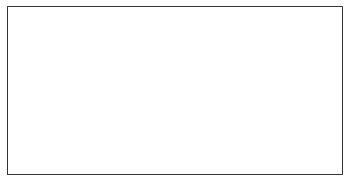

In [5]:
plt.axes(projection=ccrs.PlateCarree())

That was a little spectacular, but from the output of the previous cell, we can see that the Axes created is indeed one of those `cartopy.mpl.geoaxes.GeoAxesSubplot` instances.

### Adding GeoAxes methods

The cartopy.mpl.geoaxes.GeoAxes class adds a number of useful methods.

Some examples:

* <a href=" https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.set_global" target="_blank">set_global</a>:  zoom the map out as much as possible
* <a href="https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.set_extent" target="_blank">set_extent</a>: zoom the map to the given bounding box
* <a href="https://scitools.org.uk/cartopy/docs/latest/matplotlib/gridliner.html" target="_blank">gridlines</a>: add a graticule (and optionally labels) to the axes
* <a href="https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html?highlight=coastlines#cartopy.mpl.geoaxes.GeoAxes.coastlines" target="_blank">coastlines</a>: add Natural Earth coastlines to the axes
* <a href="https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.stock_img" target="_blank">stock_img</a>: add a low-resolution Natural Earth background image to the axes
* <a href="https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.imshow.html#matplotlib.axes.Axes.imshow" target="_blank">imshow</a>: add an image (numpy array) to the axes
* <a href="https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.add_geometries" target="_blank">add_geometries</a>: add a collection of geometries (Shapely) to the axes
* <a href="https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html?highlight=add_wms#cartopy.mpl.geoaxes.GeoAxes.add_wms" target="_blank">add_wms</a>: add a wms layers to the axes

#### Coastlines
One of the most useful methods that the `geoaxes` class adds on top of the standard matplotlib Axes class is the coastlines method. With no arguments, it will add the Natural Earth 1:110,000,000 scale coastline data to the map.

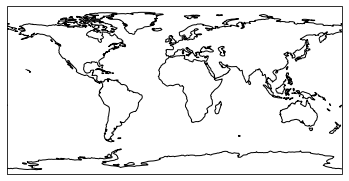

In [6]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

We could just as equally created a matplotlib subplot with one of the many approaches that exist. For example, the 
`plt.subplots` function could be used:

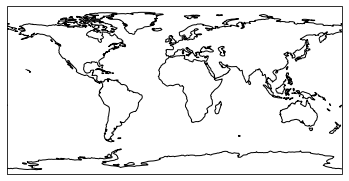

In [7]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()

This allows you to set up a figure with different panels. As such we can make for example a figure that shows two map panels.

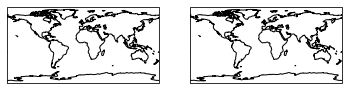

In [8]:
fig, ax = plt.subplots(ncols=2, subplot_kw={'projection': ccrs.PlateCarree()})
ax[0].coastlines()
ax[1].coastlines()

Or alternatively you could use the `plt.subplot` function to set up different projections for different figure subpanels.

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarnin

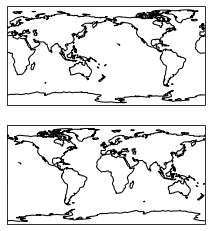

In [9]:
ax1 = plt.subplot(211, projection=ccrs.PlateCarree(central_longitude=180))
ax1.coastlines()
ax2 = plt.subplot(212, projection=ccrs.PlateCarree())
ax2.coastlines()

#### Stock_img
Another usefull GeoAxesSubplot methods is that we can add a downsampled version of the Natural Earth shaded relief raster to the map.

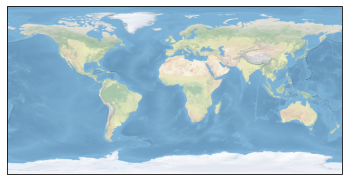

In [10]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

#### Gridlines
Yet another usefull GeoAxesSubplot methods is that we can add a gridlines to the map.

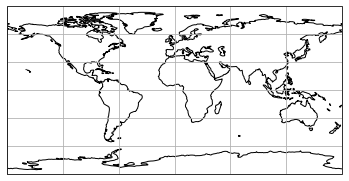

In [11]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()

And even tune them:

/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:549: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:556: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
<string>:6: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4817: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy a

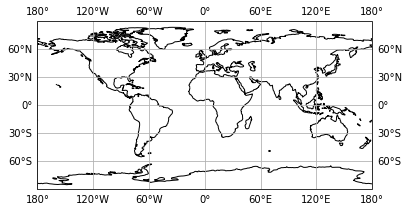

In [12]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(xlocs=np.arange(-180,190,60),draw_labels=True)

### Customizing projections
Projection classes have options we can use to customize the map:

In [13]:
ccrs.PlateCarree?

From the class signature, for example, we can see that we can set the 'central_longitude' (which defaults to 0.0). If we change this projection class parameter, we can change our mapping environment.

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarnin

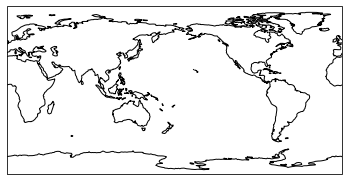

In [14]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.coastlines()

### Regional maps

If we now want to move from global to regional maps, we can use the we use the `set_extent` method of GeoAxis to limit the size of the region.

In [ ]:
ax.set_extent?

The help function shows you that do that you will need to set the (`x0, x1, y0, y1)` of the map in the given coordinate system. For example if you want to zoom on Europe you can define a region between -20 (i.e 20 degrees W), 20 (i.e 20 degrees E), 30 (i.e 30 degrees N) and 60 (i.e 60 degrees N).

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naci

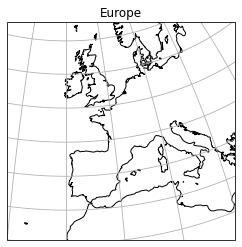

In [ ]:
import numpy as np
central_lon, central_lat = -10, 45
extent = [-20, 20, 30, 60] # with (x0, x1, y0, y1) of the map in the given coordinate system.
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat),title='Europe')
ax.set_extent(extent)
ax.coastlines(resolution='50m')
ax.gridlines()

### Adding a scalebar

By using the `matplotlib-scalebar` package we can also use a scalebar to our map, where the unit of the scalebar is by default set in the unit of the 'projection' (i.e., for Orthographic `1 unit` corresponds to `1 meter`, whereas for PlateCarree which uses lat-lon coordinates `1 unit` corresponds to `1 minute`).

In [ ]:
?ScaleBar

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


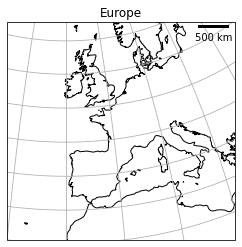

In [ ]:
import numpy as np
central_lon, central_lat = -10, 45
extent = [-20, 20, 30, 60] # with (x0, x1, y0, y1) of the map in the given coordinate system.
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat),title='Europe')
ax.set_extent(extent)
ax.coastlines(resolution='50m')
ax.gridlines()
scalebar = ScaleBar(1,box_alpha=0)
ax.add_artist(scalebar)

If you plot a scalebar it will work based on the units of the map. For example, if your projection is PlateCarree it will be in degrees, whereas in WebMercator (EPSG:3857) it will be in meters. So if you define a scalebar you should specify the unit (especially if it is not in meters)

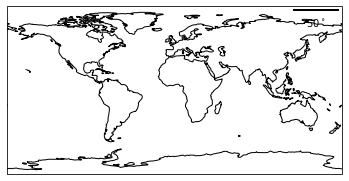

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
scalebar = ScaleBar(1,box_alpha=0,units='deg',dimension='angle')
ax.add_artist(scalebar)

If you want your units in meters, you have to convert them manually. For example you can do this by approximating one degree by 40000km (the circumference of the earth) divided by 360 (the number of degrees to cover the circumference)

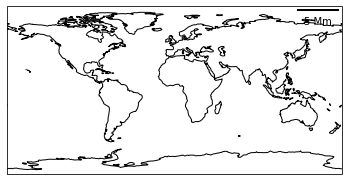

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
scalebar = ScaleBar(40000/360,box_alpha=0,units='km')
ax.add_artist(scalebar)

In this you now see that the scalebar is in 'm', actually showing `5 Mm` = 5 million meters. As this is a rather uncommon unit, we can also manually set the output to unit/value we prefer (e.g. 5000 km)

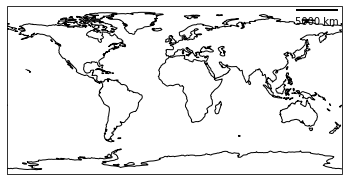

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
scalebar = ScaleBar(40000/360,box_alpha=0,units='km',fixed_units='km',fixed_value=5000)
ax.add_artist(scalebar)

### Adding Cartopy features
To give our map more styles and details, we add `cartopy.feature` objects. Many useful features are built in. These "default features" are at coarse (110m) resolution:

* `cartopy.feature.BORDERS`:	Country boundaries
* `cartopy.feature.COASTLINE`:	Coastline, including major islands
* `cartopy.feature.LAKES`:	Natural and artificial lakes
* `cartopy.feature.LAND`:	Land polygons, including major islands
* `cartopy.feature.OCEAN`:	Ocean polygons
* `cartopy.feature.RIVERS`:	Single-line drainages, including lake centerlines
* `cartopy.feature.STATES`:	(limited to the United States at this scale)

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naci

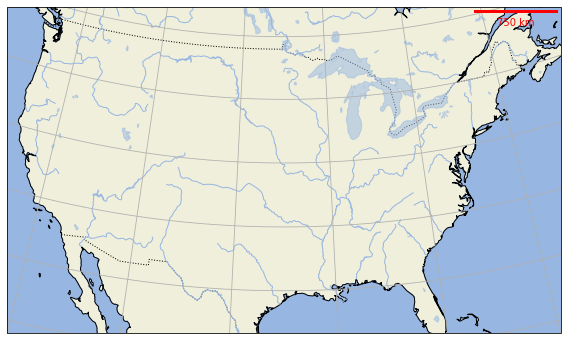

In [ ]:
import cartopy.feature as cfeature
import numpy as np

central_lat = 37.5
central_lon = -96
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

# Add land
ax.add_feature(cartopy.feature.LAND)

# Add ocean
ax.add_feature(cartopy.feature.OCEAN)

# Add cost lines
ax.add_feature(cartopy.feature.COASTLINE)

# Add country boundaries
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')

# Add lakes
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)

# Add rivers
ax.add_feature(cartopy.feature.RIVERS)

# Add gridlines
ax.gridlines()

# Add scalebar
ax.add_artist(ScaleBar(1,box_alpha=0,color='red'))

By selecting the category and scale level of the added features, we can further tune the added features. On the [NaturalEarth website](https://www.naturalearthdata.com/features/) you can check which features are available at which scale level (one of '10m', '50m', or '110m' corresponding to 1:10000,000, 1:50000000, and 1:110000000). 

For example we can download the rivers and glaciers from the physical category at 10m scale

In [ ]:
rivers_10m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m')
glaciers_10m = cfeature.NaturalEarthFeature('physical', 'glaciated_areas', '10m')

Or the city boundaries from the cultural category:

In [ ]:
urb_50m = cfeature.NaturalEarthFeature('cultural', 'urban_areas', '50m')

Subsequently you can add it to your map.

# Adding Data to the Map

Now that we know how to create a map and how to add cartopy featurtes, let's add our own data to it! 

Because our map is a matplotlib axis, we can use all the familiar maptplotlib commands to make plots. By default, the map extent will be adjusted to match the data. We can override this with the `.set_global` or `.set_extent` commands.

The core concept when adding data is that the projection of your axes is independent of the coordinate system your data is defined in. The projection argument is used when creating plots and determines the projection of the resulting plot (i.e. what the plot looks like). The transform argument to plotting functions tells Cartopy what coordinate system your data are defined in.

When doing this the data also have to be transformed to the projection space. This is done via the `transform=` keyword in the plotting method. The argument is another `cartopy.crs` object. If you don't specify a transform, Cartopy assume that the data is using the same projection as the underlying GeoAxis.

To summarize:
+ The projection of your axes is independent of the coordinate system your data is defined in.
+ The `projection` argument is used when creating plots and determines the projection of the resulting plot.
+ The `transform` argument to plotting functions tells Cartopy what coordinate system your data are defined in.

For more info you can always check the <a href="https://scitools.org.uk/cartopy/docs/latest/tutorials/understanding_transform.html" target="_blank">cartopy information</a>.

In the following example, you can see how different transforms result in different lines, where the first one is a line in the projection of the map (i.e. PlateCaree) resulting in a straight line and the second is a line in the Geodetic projection (i.e. on a sphere), resulting in a curved line that represents the shortest distance on a real globe

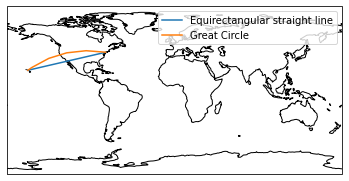

In [ ]:
# create some test data
new_york = dict(lon=-74.0060, lat=40.7128)
honolulu = dict(lon=-157.8583, lat=21.3069)
lons = [new_york['lon'], honolulu['lon']]
lats = [new_york['lat'], honolulu['lat']]
# Plot in
ax = plt.axes(projection=ccrs.PlateCarree())
ax.plot(lons, lats, label='Equirectangular straight line') # straight line in the projection of the map (i.e. PlateCaree)
ax.plot(lons, lats, label='Great Circle', transform=ccrs.Geodetic()) # line in the Geodetic projection (i.e. on a sphere), resulting in a curved line that represents the shortest distance on a real globe
ax.coastlines()
ax.legend()
ax.set_global()

## Adding text and points
By using the standard `plot` and `text` plotting commands we can also annotate the map by adding points and lines (`plot`) and text (`text`) just as you would do in a normal matplotlib plot but now using the geograpic coordinates as x/y coordinates.

Text(-117, 33, 'San Diego')

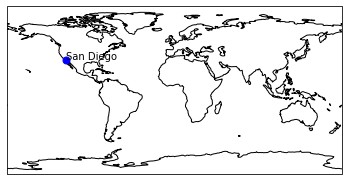

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
ax.plot(-117.1625, 32.715, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-117, 33, 'San Diego', transform=ccrs.Geodetic())

## Adding lines
We can alos add lines using the standard data line plots

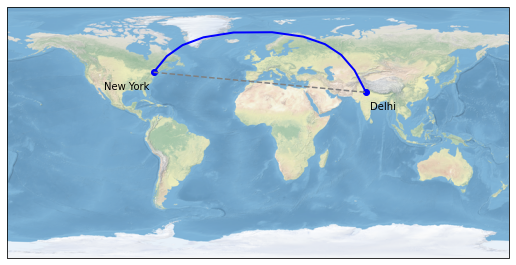

In [ ]:
plt.figure(figsize=(9, 5))

map_projection = ccrs.PlateCarree()

ax = plt.axes(projection=map_projection)
ax.stock_img()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic())

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree())

plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.show()

## Adding 2D raster data

The same principles apply to 2D data. Below we create some example data defined in regular lat / lon coordinates.

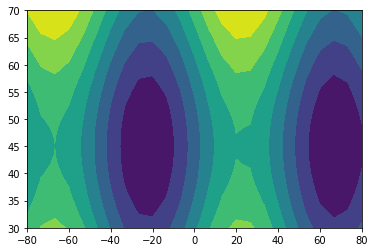

In [ ]:
lon = np.linspace(-80, 80, 25)
lat = np.linspace(30, 70, 25)
lon2d, lat2d = np.meshgrid(lon, lat)
data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)
plt.contourf(lon2d, lat2d, data)

Now we create a `PlateCarree` projection and plot the data on it without any transform keyword. This happens to work because `PlateCarree` is the simplest projection of lat / lon data.

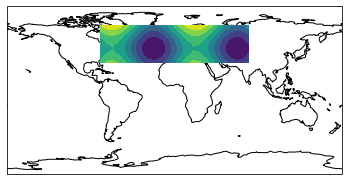

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data)

However, if we try the same thing with a different projection, the data are not properly located and the plot either does not plot the data and/or plots it at the wrong location.

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:385: ShapelyDeprecationWarning: Iteration over multi-pa

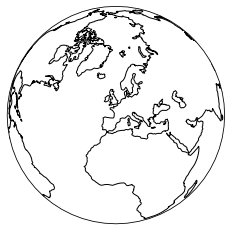

In [ ]:
# projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
projection = ccrs.Orthographic(central_latitude=45)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data)

To fix this, we need to pass the correct transform argument to contourf:

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:385: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings.extend(multi_line_string)
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:385: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings.extend(multi_line_string)


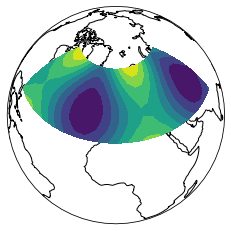

In [ ]:
projection = ccrs.Orthographic(central_latitude=45)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data, transform=ccrs.PlateCarree())

## Adding a colorbar
When adding data it is always good practice to add a legend and/or colorbar. Since you work in a normal plot environment you can use the classic colorbar

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:385: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings.extend(multi_line_string)
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:385: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings.extend(multi_line_string)


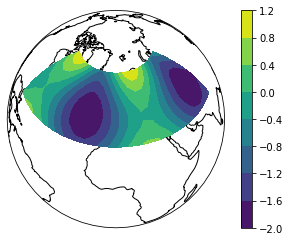

In [ ]:
projection = ccrs.Orthographic(central_latitude=45)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
im = ax.contourf(lon, lat, data, transform=ccrs.PlateCarree())
plt.colorbar(im)

## Adding a legend
Or we can alternatively add a legend as we already did before using the standard legend function:

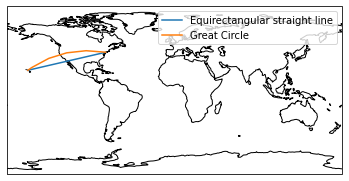

In [ ]:
# Plot in
ax = plt.axes(projection=ccrs.PlateCarree())
ax.plot(lons, lats, label='Equirectangular straight line') # straight line in the projection of the map (i.e. PlateCaree)
ax.plot(lons, lats, label='Great Circle', transform=ccrs.Geodetic()) # line in the Geodetic projection (i.e. on a sphere), resulting in a curved line that represents the shortest distance on a real globe
ax.coastlines()
ax.set_global()

# Add a legend
ax.legend()


Or tune the legend if we want to use manually defined color patches instead of lines.

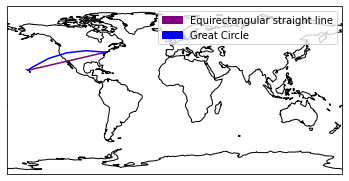

In [ ]:
import matplotlib.patches as mpatches
ax = plt.axes(projection=ccrs.PlateCarree())
ax.plot(lons, lats, color='purple', label='') # straight line in the projection of the map (i.e. PlateCaree)
ax.plot(lons, lats, color='blue', label='Great Circle', transform=ccrs.Geodetic()) # line in the Geodetic projection (i.e. on a sphere), resulting in a curved line that represents the shortest distance on a real globe
ax.coastlines()
ax.set_global()

# Adding a manually defined legend
patch1 = mpatches.Patch(color='purple', label='Equirectangular straight line')
patch2 = mpatches.Patch(color='blue', label='Great Circle')
plt.legend(handles=[patch1,patch2],loc='upper right')

## Adding images

Similarly, we can easily add (satellite) image easily on a map if we know its extent. For example, we can add the satellite image (e.g. Miriam.A2012270.2050.2km.jpg from a website). 

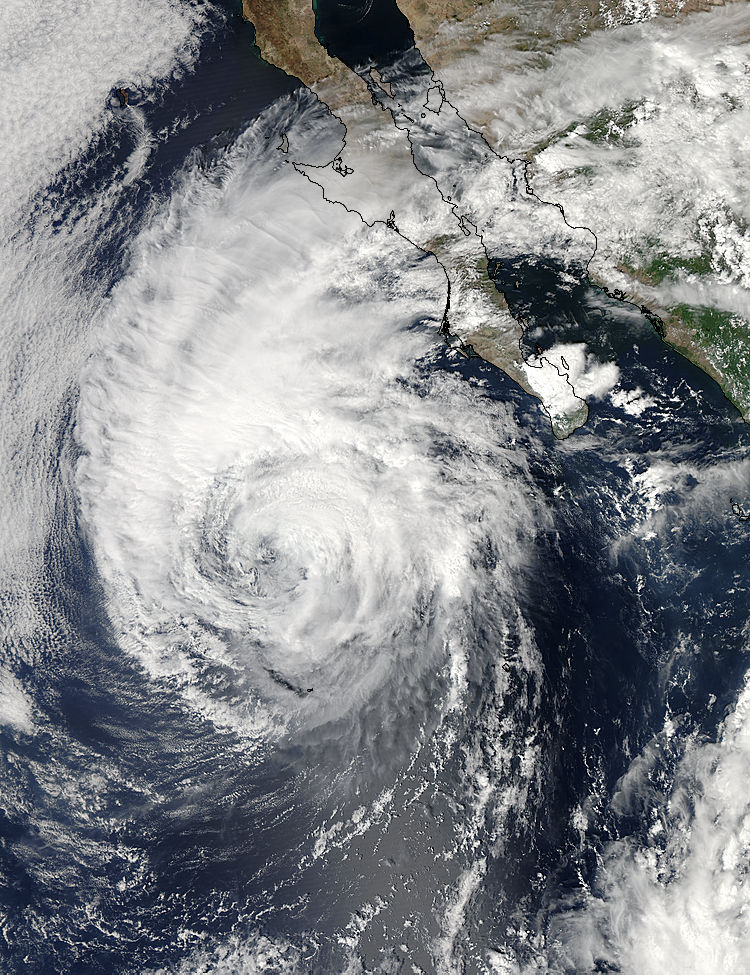

In [ ]:
# Get the remote file
from urllib.request import urlopen
from PIL import Image
url = "https://lance-modis.eosdis.nasa.gov/imagery/gallery/2012270-0926/Miriam.A2012270.2050.2km.jpg"

img = Image.open(urlopen(url))
img

Or we can read it in locally from your computer or colab folder if you download the image from the url to your local computer or drive (for colab)

Subsequently we can add the image to our map. Therefore, we have to take into account how the origin of the image is defined. For geographic data sets the origin is often the upper left corner whereas for most coordinate systems/plots the origin is in the lower left corner.

Text(-117, 33, 'San Diego')

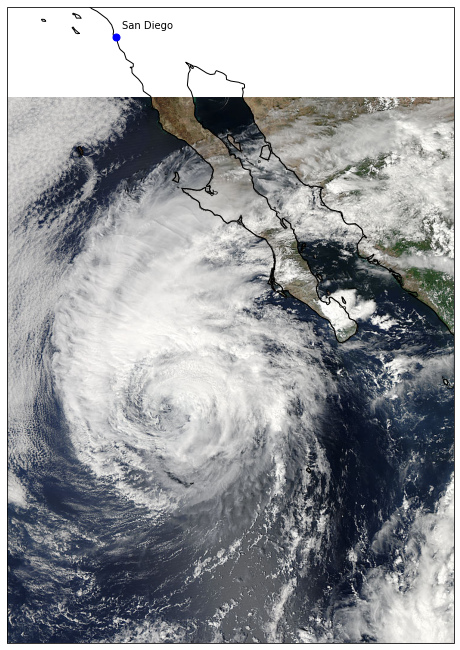

In [ ]:
# Since the loaded image is not geographically located we have to manually set the image extent
img_extent = (-120.67660000000001, -106.32104523100001, 13.2301484511245, 30.766899999999502)

# Initialize a figure
fig = plt.figure(figsize=(8, 12))
ax = plt.axes(projection=ccrs.PlateCarree())

# add the image. Because this image was a tif, the "origin" of the image is in the
# upper left corner
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())

# Add the coastlines to see if the image is properly located
ax.coastlines(resolution='50m', color='black', linewidth=1)

# mark a known place to help us geo-locate ourselves
ax.plot(-117.1625, 32.715, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-117, 33, 'San Diego', transform=ccrs.Geodetic())

## Adding WMS layers
We can also add WMS layers. WMS provides a simple HTTP interface (internet) for requesting geo-registered map images from one or more distributed geospatial databases. A WMS request defines the geographic layer(s) and area of interest to be processed. The response to the request is one or more geo-registered map images (returned as JPEG, PNG, etc) that can be displayed. 

To add WMS data you need:
*  an **area of interest**, which is defined by your plot extent
*  a link to a geospatial **WMS server**. This could be for example the WMS server of [NASA worldview](https://worldview.earthdata.nasa.gov/) for global satellite records or to the WMS server of [PDOK](https://www.pdok.nl/geo-services/-/article/luchtfoto-pdok) for airborne imagery over the Netherlands or any other WMS service you find online
* a **layer name** to be visualized. You can find the name of these layers at the respective WMS providers typically with the `GetCapabilities` request (e.g. https://gibs.earthdata.nasa.gov/wms/epsg4326/best/wms.cgi?SERVICE=WMS&REQUEST=GetCapabilities&VERSION=1.3.0  for NASA or https://service.pdok.nl/hwh/luchtfotorgb/wms/v1_0?&request=GetCapabilities&service=wms for PDOK) and then search for the `name` tag in the XML file.
* other optional arguments such as a `time` argument for the MODIS data to query for a specific date




In this case we are going to request a WMS layer from the [NASA worldview database](https://worldview.earthdata.nasa.gov/) using:


*   `https://gibs.earthdata.nasa.gov/wms/epsg4326/best/wms.cgi` as the WMS server
*   `VIIRS_SNPP_CorrectedReflectance_TrueColor` as the layer which implies we are going to visualize the Visible Infrared Imaging Radiometer Suite (VIIRS) Corrected Reflectance which are called true-color or natural color because this combination of wavelengths is similar to what the human eye would see. 
* `2021-01-01` as the time to visualize the first of Jan 2021:

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/usr/local/lib/python3.7/dist-packages/cartopy/io/ogc_clients.py:165: ShapelyDeprecationWarning: Iteration ov

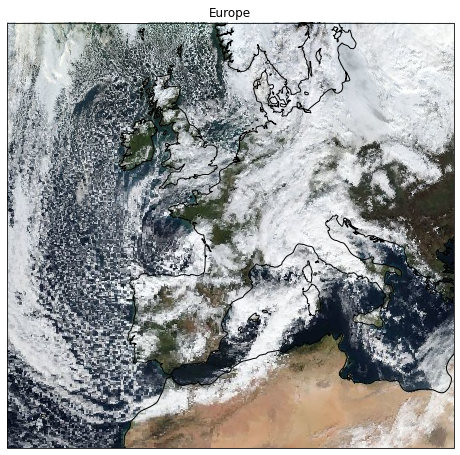

In [ ]:
fig = plt.figure(figsize=(8, 12))
central_lon, central_lat = -10, 45
extent = [-20, 20, 30, 60] # with (x0, x1, y0, y1) of the map in the given coordinate system.
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat),title='Europe')
ax.set_extent(extent)
ax.coastlines(resolution='50m')
ax.add_wms(wms='https://gibs.earthdata.nasa.gov/wms/epsg4326/best/wms.cgi',layers=['VIIRS_SNPP_CorrectedReflectance_TrueColor'],wms_kwargs={'time':'2021-01-01'})


Similarly we can visualize the PDOK orthophotos over the Netherlands using:
* A subset of Delft as the area
*   `https://service.pdok.nl/hwh/luchtfotorgb/wms/v1_0` as the WMS server
*   `Actueel_ortho25` as the recent 25cm orthophotos or `2016_ortho25` as the 2016 25cm orthophotos


/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/usr/local/lib/python3.7/dist-packages/cartopy/io/ogc_clients.py:165: ShapelyDeprecationWarning: Iteration ov

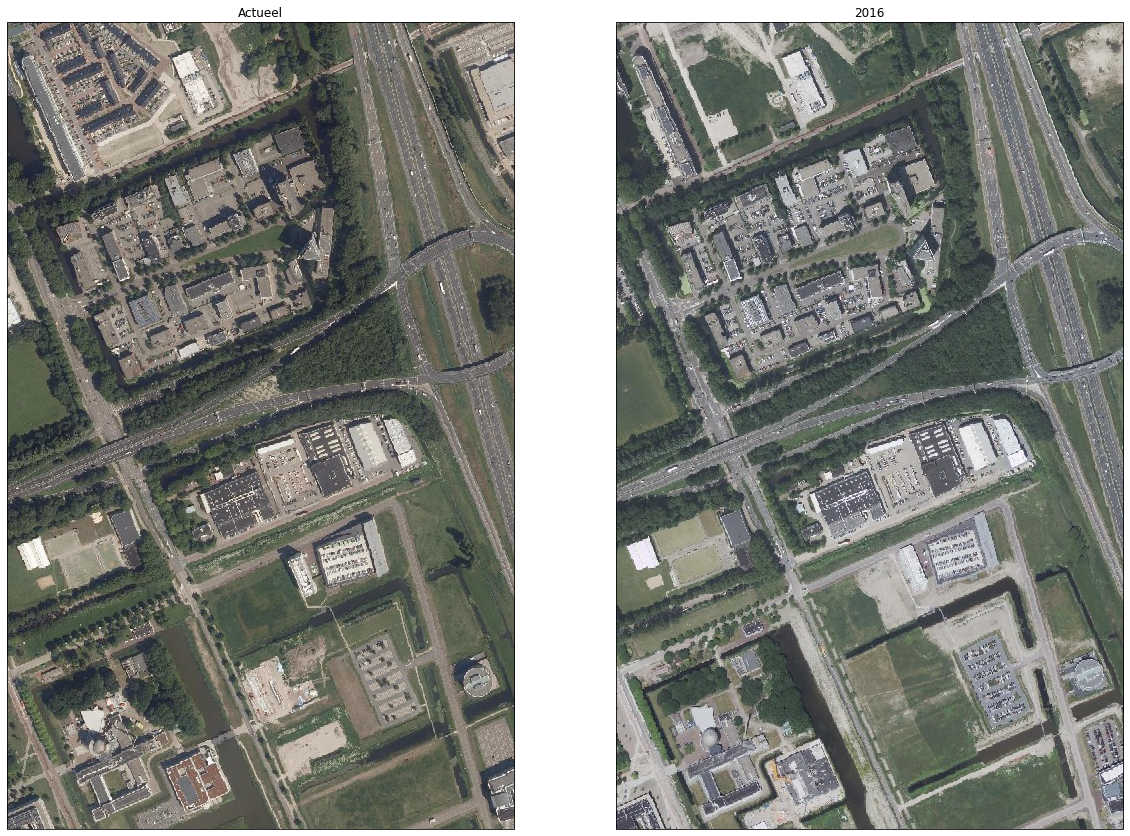

In [ ]:
plt.figure(figsize=(20,20))
crs = ccrs.epsg(32631)

# Actueel
ax1 = plt.subplot(121, projection=crs, title='Actueel')
ax1.set_extent([4.38,4.39,51.99,52],crs=ccrs.PlateCarree())
ax1.add_wms(wms='https://service.pdok.nl/hwh/luchtfotorgb/wms/v1_0',layers=['Actueel_ortho25'])

# 2016
ax2 = plt.subplot(122, projection=crs, title='2016')
ax2.set_extent([4.38,4.39,51.99,52],crs=ccrs.PlateCarree())
ax2.add_wms(wms='https://service.pdok.nl/hwh/luchtfotorgb/wms/v1_0',layers=['2016_ortho25'])

# Reading data from Open Streetmap

Now that we learned how to setup a map and add data to it, we are going to try to add Open Streetmap data to our map. Therefore we will use the `osmnx` package, which is a Python package for downloading administrative boundary shapes and street networks from OpenStreetMap. It allows you to easily construct, project, visualize, and analyze complex street networks in Python with NetworkX. You can get a city’s or neighborhood’s walking, driving, or biking network with a single line of Python code. 

#### Open Streetmap
*OpenStreetMap (OSM) is a global collaborative (crowd-sourced) dataset and project that aims at creating a free editable map of the world containing a lot of information about our environment. It contains data for example about streets, buildings, different services, and landuse to mention a few. OSM has a large userbase with more than 4 million users that contribute actively on OSM by updating the OSM database with 3 million changesets per day. In total OSM contains more than 4 billion nodes that form the basis of the digitally mapped world that OSM provides. OpenStreetMap is used not only for integrating the OSM maps as background maps to visualizations or online maps, but also for many other purposes such as routing, geocoding, education, and research. OSM is also widely used for humanitarian response e.g. in crisis areas (e.g. after natural disasters) and for fostering economic development (see more from Humanitarian OpenStreetMap Team (HOTOSM) website.*

`osmnx` allows you to query based on different syntaxes. For example, based on a text string:

In [ ]:
import osmnx as ox

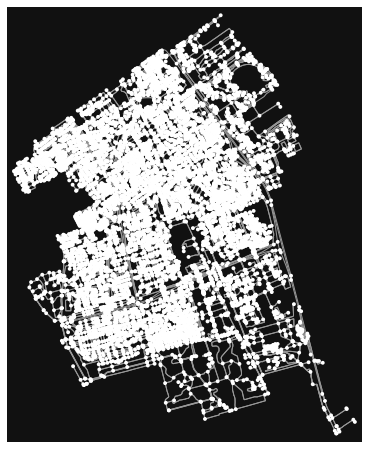

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [ ]:
G = ox.graph_from_place('Delft, Netherlands')
ox.plot_graph(G)

Or from a bounding box:

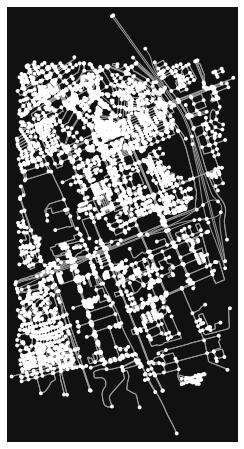

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [ ]:
G = ox.graph_from_bbox(52.01,51.98,4.39,4.36,retain_all=True,truncate_by_edge=True)
ox.plot_graph(G)

#### OSM data types

In [ ]:
type(G)

networkx.classes.multidigraph.MultiDiGraph

As you can see from the previous cell: the output of these queries is a `networkx.classes.multidigraph.MultiDiGraph`. A DiGraph is a `vector` data type that stores nodes and edges with optional data, or attributes. Graphs are used to store spatial network data (such as streets, paths, canals, etc). What we can see here is that this data type belongs to a Python module called networkx that can be used to create, manipulate, and study the structure, dynamics, and functions of complex networks.

If, however, we want to implement the OSM data in our mapping environment, it might be handy to have our OSM data in a `geopandas` format, which is a pandas format (like you have seen before) but for geographical data. osmnx provides a convenient function `graph_to_gdfs()` that can convert the graph data into two separate GeoDataFrames where the first one contains the information about the nodes and the second one about the edges.

In [ ]:
nodes, edges = ox.graph_to_gdfs(G)

In [ ]:
nodes.head()

y         x  street_count highway  ref  \
osmid                                                      
26017586  52.009921  4.362501             4     NaN  NaN   
26485706  52.009178  4.360352             3     NaN  NaN   
26485722  52.008989  4.360554             1     NaN  NaN   
26485759  52.009739  4.362089             4     NaN  NaN   
26485760  52.009493  4.362360             3     NaN  NaN   

                          geometry  
osmid                               
26017586  POINT (4.36250 52.00992)  
26485706  POINT (4.36035 52.00918)  
26485722  POINT (4.36055 52.00899)  
26485759  POINT (4.36209 52.00974)  
26485760  POINT (4.36236 52.00949)

From the output of the previous cell you can see that `nodes` is similar to a classic pandas data type with an `id` for rows and different columns. What makes it a geopandas dataset is that it also stores a `geometry` column that in this case contains point data with geographical coordinates. Similar for the edges, but that one contains `lines`.

In [ ]:
edges.head()

osmid           name  \
u        v          key                                        
26017586 1575265113 0                 7538772  Paradijspoort   
         44841573   0                 7538772  Paradijspoort   
         44844082   0                 7538797     Achtersack   
         26485759   0    [815610369, 4348586]   Pieterstraat   
26485706 44841182   0                 7538618   Huyterstraat   

                                       highway  oneway  length  \
u        v          key                                          
26017586 1575265113 0               pedestrian   False  66.658   
         44841573   0               pedestrian   False  57.961   
         44844082   0                  footway   False  46.649   
         26485759   0    [footway, pedestrian]   False  34.731   
26485706 44841182   0                  footway   False  53.139   

                                                                  geometry  \
u        v          key                                                      
26017586 1575265113 0    LINESTRING (4.36250 52.00992, 4.36237 52.00996...   
         44841573   0    LINESTRING (4.36250 52.00992, 4.36296 52.00952...   
         44844082   0    LINESTRING (4.36250 52.00992, 4.36260 52.00994...   
         26485759   0    LINESTRING (4.36250 52.00992, 4.36223 52.00980...   
26485706 44841182   0      LINESTRING (4.36035 52.00918, 4.36105 52.00938)   

                        maxspeed lanes bridge service width access tunnel  \
u        v          key                                                     
26017586 1575265113 0        NaN   NaN    NaN     NaN   NaN    NaN    NaN   
         44841573   0        NaN   NaN    NaN     NaN   NaN    NaN    NaN   
         44844082   0        NaN   NaN    NaN     NaN   NaN    NaN    NaN   
         26485759   0        NaN   NaN    NaN     NaN   NaN    NaN    NaN   
26485706 44841182   0        NaN   NaN    NaN     NaN   NaN    NaN    NaN   

                         ref junction  
u        v          key                
26017586 1575265113 0    NaN      NaN  
         44841573   0    NaN      NaN  
         44844082   0    NaN      NaN  
         26485759   0    NaN      NaN  
26485706 44841182   0    NaN      NaN

Now, as we can see, we have our graph as GeoDataFrames and we can plot them using the same functions and tools as we have used before. Therefore, we just need to load the `geodataframa['geometery']` to our cartopy environment.

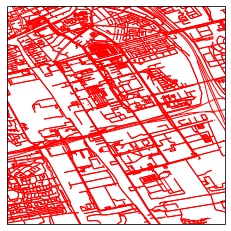

In [ ]:
plt.figure()
crs=ccrs.PlateCarree()
ax = plt.axes(projection=crs)
ax.set_extent([4.36,4.39,51.98,52.01])
ax.add_geometries(edges['geometry'],crs=crs,linewidth=1, edgecolor='red',facecolor='None')



## Geopandas

You can also create off course your own geopandas data file by adding geo-data to a normal pandas data structure. For more background check the [geopandas manual](https://geopandas.org/getting_started/introduction.html).

In [ ]:
import pandas as pd
import geopandas
# Make a pandas data frame
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})
# Convert it to a geoDataFrame
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))
# Set the projection system
gdf = gdf.set_crs(epsg=4326)
print(gdf)

           City    Country  Latitude  Longitude                     geometry
0  Buenos Aires  Argentina    -34.58     -58.66  POINT (-58.66000 -34.58000)
1      Brasilia     Brazil    -15.78     -47.91  POINT (-47.91000 -15.78000)
2      Santiago      Chile    -33.45     -70.66  POINT (-70.66000 -33.45000)
3        Bogota   Colombia      4.60     -74.08    POINT (-74.08000 4.60000)
4       Caracas  Venezuela     10.48     -66.86   POINT (-66.86000 10.48000)


We can add these point data to the map using the geopandas method for plotting

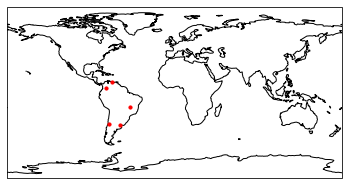

In [ ]:
crs=ccrs.PlateCarree()
ax = plt.axes(projection=crs)
ax.coastlines()
gdf.plot(ax=ax, markersize=10,color='red',transform=ccrs.Geodetic())
ax.set_global()

Alternatively, we can also read in geopandas data from local files (e.g. a geosjon file). You can create such geojson files with many platform but one way is digitalise them manually (e.g. using [geojson.oi](https://geojson.io/)) and download them as geojson. For example, in this example, we manually digitised a water class with two polygons and saved it as a water.json file.

In [ ]:
filename='https://raw.githubusercontent.com/steflhermitte/EO-Notebooks/master/vegetation.geojson'
df = geopandas.read_file(filename)
df

geometry
0  POLYGON ((4.37277 52.00295, 4.37455 52.00339, ...
1  POLYGON ((4.37790 52.00071, 4.37960 51.99787, ...
2  POLYGON ((4.37792 51.99552, 4.37872 51.99424, ...
3  POLYGON ((4.37247 51.99348, 4.37269 51.99295, ...

Now we have our GeoDataFrame and can start working with its geometry.

Since we have only one geometry column, it is automatically seen as the active geometry and methods used on GeoDataFrame will be applied to the "geometry" column.

For example, we can buffer the points (e.g. with 5000km in a certain projection system). To do so we first need to convert it to a projection system where the units are in m.

For example we can convert it to WebMercator (epsg=3875) and then buffer.



In [ ]:
buffer=gdf.to_crs(3857).buffer(5000000)
buffer

0    POLYGON ((-1530001.330 -4106950.295, -1554077....
1    POLYGON ((-333316.804 -1779259.486, -357393.17...
2    POLYGON ((-2865835.219 -3955187.399, -2889911....
3    POLYGON ((-3246547.878 512620.654, -3270624.24...
4    POLYGON ((-2442821.154 1173188.376, -2466897.5...
dtype: geometry

Or convert it to Plate Carree where you will get different buffers.

In [ ]:
buffer2=gdf.to_crs('+proj=eqc +lat_ts=0 +lat_0=0 +lon_0=0 +x_0=0 +y_0=0').buffer(5000000).to_crs(3857)
# buffer2=gdf.to_crs(32663).buffer(5000000).to_crs(3857)
buffer2

0    POLYGON ((-1530001.330 -4106950.295, -1554077....
1    POLYGON ((-333316.804 -1779259.486, -357393.17...
2    POLYGON ((-2865835.219 -3955187.399, -2889911....
3    POLYGON ((-3246547.878 512620.654, -3270624.24...
4    POLYGON ((-2442821.154 1173188.376, -2466897.5...
dtype: geometry

Not that the result of this buffering is a polygon and not a point so we need the `add_geometries` function to add it to our map.

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarnin

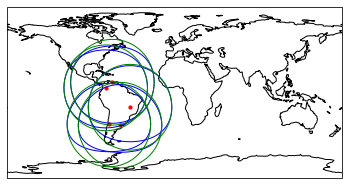

In [ ]:
crs=ccrs.PlateCarree()
ax = plt.axes(projection=crs)
gdf.plot(ax=ax, markersize=10,color='red',transform=ccrs.Geodetic())
ax.coastlines()
ax.set_global()

ax.add_geometries(buffer, crs=ccrs.epsg(3857), edgecolor='blue',facecolor='none',linewidth=1)

You can also use geopandas to calculate the area of polygons.

In [ ]:
print(buffer.area)

0    1.174499e+14
1    9.026536e+13
2    1.144481e+14
3    8.574914e+13
4    8.744592e+13
dtype: float64
0    7.841371e+13
1    7.841371e+13
2    7.841371e+13
3    7.841371e+13
4    7.841371e+13
dtype: float64


Or calculate the centroid:

In [ ]:
buffer.centroid

0    POINT (-6530001.330 -4106950.295)
1    POINT (-5333316.804 -1779259.486)
2    POINT (-7865835.219 -3955187.399)
3      POINT (-8246547.878 512620.654)
4     POINT (-7442821.154 1173188.376)
dtype: geometry

Or measure the distance between geometries

In [ ]:
points = gdf['geometry'].to_crs(3857)
first_point = points.iloc[0]
points.distance(first_point)

0    0.000000e+00
1    2.617288e+06
2    1.344427e+06
3    4.928181e+06
4    5.358461e+06
dtype: float64

In [ ]:
gdf.iloc[1]

City                      Brasilia
Country                     Brazil
Latitude                    -15.78
Longitude                   -47.91
geometry     POINT (-47.91 -15.78)
Name: 1, dtype: object

## Query data as footprint polygons
Besides querying OSM for networkx graphs, we can also query for footprints, where footprints are polygons representing different features and where the `tag` represents a OSM tag key e.g. ‘building’, ‘landuse’, ‘place’, etc.

To get an overview of potential footprints: check the [OSM webpage](https://www.openstreetmap.org/) using [Query features tool](https://blog.openstreetmap.org/2014/12/01/new-query-feature/) to identify the available OSM tag's in your area. This [OSM wiki](https://wiki.openstreetmap.org/wiki/Browsing) should provide you with some help on how to  browse the OSM-webpage.

For example, if you want to query the different land uses, you can do:

In [ ]:
lu=ox.geometries.geometries_from_bbox(north=52.01, south=51.98, east=4.39, west=4.36,tags={'landuse': True})
lu

/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


barrier  \
element_type osmid              
way          20207092     NaN   
             20208420     NaN   
             20210754     NaN   
             32017869     NaN   
             32654837     NaN   
...                       ...   
relation     13680788     NaN   
             13721605     NaN   
             13721606     NaN   
             13974345     NaN   
             13989102     NaN   

                                                                geometry  \
element_type osmid                                                         
way          20207092  POLYGON ((4.36925 51.98134, 4.36847 51.98118, ...   
             20208420  POLYGON ((4.39462 52.01127, 4.39434 52.01172, ...   
             20210754  POLYGON ((4.39043 52.00010, 4.39190 51.99763, ...   
             32017869  POLYGON ((4.37070 52.00186, 4.37067 52.00185, ...   
             32654837  POLYGON ((4.36862 51.99531, 4.37051 51.99571, ...   
...                                                                  ...   
relation     13680788  POLYGON ((4.37642 52.00226, 4.37670 52.00244, ...   
             13721605  POLYGON ((4.36109 52.00419, 4.36148 52.00435, ...   
             13721606  POLYGON ((4.36114 52.00433, 4.36112 52.00434, ...   
             13974345  POLYGON ((4.38813 51.98063, 4.38809 51.98075, ...   
             13989102  POLYGON ((4.38172 51.97925, 4.38169 51.97925, ...   

                      addr:city addr:housenumber addr:postcode addr:street  \
element_type osmid                                                           
way          20207092       NaN              NaN           NaN         NaN   
             20208420       NaN              NaN           NaN         NaN   
             20210754       NaN              NaN           NaN         NaN   
             32017869       NaN              NaN           NaN         NaN   
             32654837       NaN              NaN           NaN         NaN   
...                         ...              ...           ...         ...   
relation     13680788       NaN              NaN           NaN         NaN   
             13721605       NaN              NaN           NaN         NaN   
             13721606       NaN              NaN           NaN         NaN   
             13974345       NaN              NaN           NaN         NaN   
             13989102       NaN              NaN           NaN         NaN   

                                   name start_date  \
element_type osmid                                   
way          20207092  De Vrije Tuinder        NaN   
             20208420               NaN        NaN   
             20210754          Delfpark        NaN   
             32017869               NaN        NaN   
             32654837   Lijm en Cultuur        NaN   
...                                 ...        ...   
relation     13680788               NaN        NaN   
             13721605               NaN        NaN   
             13721606               NaN        NaN   
             13974345               NaN        NaN   
             13989102               NaN        NaN   

                                             website  \
element_type osmid                                     
way          20207092                            NaN   
             20208420                            NaN   
             20210754                            NaN   
             32017869                            NaN   
             32654837  https://www.lijmencultuur.nl/   
...                                              ...   
relation     13680788                            NaN   
             13721605                            NaN   
             13721606                            NaN   
             13974345                            NaN   
             13989102                            NaN   

                                                                   nodes  ...  \
element_type osmid                                                        .

Similarly, you might realize that the OSM data set is not complete (e.g. buildings are missing or all buildings in complete neighbourhoods are missing). This is inherent of the open status of OSM and the fact that it is still in development. In notebook 2-3 we will use satellite data to fill in these gaps.

## Footprints as geopandas
The queried footprints are returned geopandas dataframes which can be processed as normal pandas dataframes. For example, we can create an array of unique values in the 'landuse' column of the lu variable by using pandas `unique` command.

In [ ]:
lu['landuse'].unique()

array(['allotments', 'residential', 'industrial', 'grass',
       'recreation_ground', 'brownfield', 'forest', 'construction',
       'commercial', 'meadow', 'cemetery', 'retail', 'railway',
       'village_green'], dtype=object)

Or calculate the amount of footprints per 'landuse' type

In [ ]:
lu['landuse'].value_counts()

grass                604
forest               260
construction          19
residential           11
industrial            10
recreation_ground      7
allotments             4
commercial             3
meadow                 3
cemetery               3
retail                 3
brownfield             1
railway                1
village_green          1
Name: landuse, dtype: int64

Based on these exploratory analyses, we can reclassify our landuse variable into subsets representing the most dominant (in polygon numbers). For example, we can subset the `lu` variable keeping only these rows where `landuse==grass`.

In [ ]:
grass=lu[lu['landuse']=='grass']

## Projecting geodata frames

The geodata frames can also be converted to any projection system. If you don't provide a coordinate reference system it will project to the UTM CRS for the UTM zone in which theGeoDataFrame's centroid lies. Otherwise project to the CRS defined by to_crs.

In [ ]:
from pyproj import CRS
grass_proj=ox.project_gdf(grass)
grass_proj2=ox.project_gdf(grass,to_crs=CRS.from_epsg(3857))

# Adding projected OSM to a map

Subsequently, these can be added to your own map

# Done
Based on these examples, you should be able to finish the notebook for session 1.